In [1]:
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import read_csv
from pandas import Series, DataFrame 
from sklearn.impute import SimpleImputer

In [2]:
titanic = sns.load_dataset("titanic")
#pd.read_csv('https://raw.githubusercontent.com/ismayc/pnwflights14/master/data/flights.csv')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [5]:
# General statistical analysis of numerical attributes
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 1.WAP to handle values in a dataset

In [6]:
#declaring a variable for NaN
missing=np.NaN
#creating Series
d1=Series(['r1',missing,'r3','r4',missing,'r5'])
d1

0     r1
1    NaN
2     r3
3     r4
4    NaN
5     r5
dtype: object

In [7]:
#Total missing values 
d1.isnull().sum()

2

In [8]:
#fill NaN 
f1=d1.fillna('r')
f1

0    r1
1     r
2    r3
3    r4
4     r
5    r5
dtype: object

In [9]:
#drop columns containing NaN
f1=d1.dropna()
f1

0    r1
2    r3
3    r4
5    r5
dtype: object

In [10]:
#Creating a dataframe
np.random.seed(25)
dd=DataFrame(np.random.randn(36).reshape(6,6))
dd.loc[3:5,0]=missing
dd.loc[1:2,4]=missing
dd

,0,1,2,3,4,5
0,0.228273,1.026890,-0.839585,-0.591182,-0.956888,-0.222326
1,-0.619915,1.837905,-2.053231,0.868583,NaN,-0.232312
2,2.152957,-1.334661,0.076380,-1.246089,NaN,-1.049942
3,NaN,-0.419678,2.294842,-2.594487,2.822756,0.680889
4,NaN,-1.976254,0.533340,-0.290870,-0.513520,1.982626
5,NaN,-1.839905,1.607671,0.388292,0.399732,0.405477


In [11]:
#total NaN values columnwise
dd.isnull().sum()

0    3
1    0
2    0
3    0
4    2
5    0
dtype: int64

In [12]:
#fiiling NaN using ffill method i.e. replacing wih precedent value
ff=dd.fillna(method='ffill')
ff

,0,1,2,3,4,5
0,0.228273,1.026890,-0.839585,-0.591182,-0.956888,-0.222326
1,-0.619915,1.837905,-2.053231,0.868583,-0.956888,-0.232312
2,2.152957,-1.334661,0.076380,-1.246089,-0.956888,-1.049942
3,2.152957,-0.419678,2.294842,-2.594487,2.822756,0.680889
4,2.152957,-1.976254,0.533340,-0.290870,-0.513520,1.982626
5,2.152957,-1.839905,1.607671,0.388292,0.399732,0.405477


In [13]:
#dropping NaN column wise
fi=dd.dropna()
fi

,0,1,2,3,4,5
0,0.228273,1.02689,-0.839585,-0.591182,-0.956888,-0.222326


In [14]:
#dropping NaN row wise
fi=dd.dropna(axis=1)
fi

,1,2,3,5
0,1.026890,-0.839585,-0.591182,-0.222326
1,1.837905,-2.053231,0.868583,-0.232312
2,-1.334661,0.076380,-1.246089,-1.049942
3,-0.419678,2.294842,-2.594487,0.680889
4,-1.976254,0.533340,-0.290870,1.982626
5,-1.839905,1.607671,0.388292,0.405477


In [15]:
#filling columns containg NaN with specific values 
fi=dd.fillna({0:1.1,4:2.7})
fi

,0,1,2,3,4,5
0,0.228273,1.026890,-0.839585,-0.591182,-0.956888,-0.222326
1,-0.619915,1.837905,-2.053231,0.868583,2.700000,-0.232312
2,2.152957,-1.334661,0.076380,-1.246089,2.700000,-1.049942
3,1.100000,-0.419678,2.294842,-2.594487,2.822756,0.680889
4,1.100000,-1.976254,0.533340,-0.290870,-0.513520,1.982626
5,1.100000,-1.839905,1.607671,0.388292,0.399732,0.405477


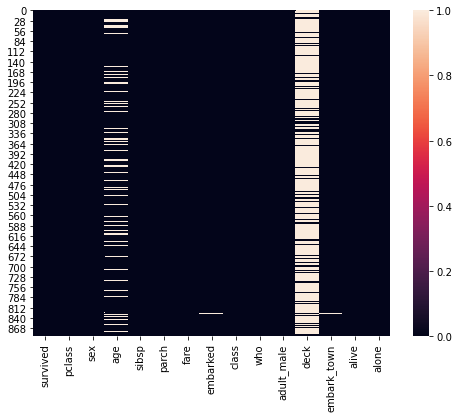

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(titanic.isnull())
plt.show()

Here, we can see majority of values in the deck column are missing, hence we can drop the column.

Since the column pairs: ('survived' and 'alive'), ('sex' and 'who'), ('embarked' and 'embark_town'), ('pclass' and 'class') signify the same thing, we can drop either column from each pair.

Also, whether a person is an adult male or not can be determined using age and sex columns, hence we can also remove the adult_male column.

In [17]:
titanic = titanic.drop(['deck','alive','who','embark_town','adult_male','class'],axis=1)

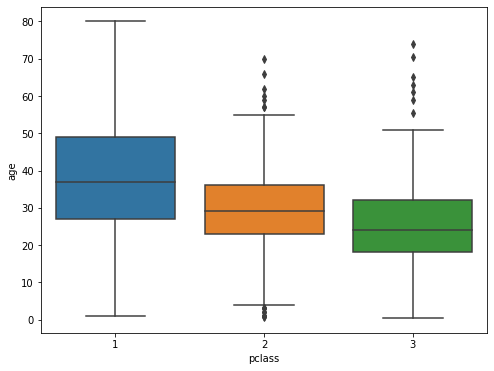

In [18]:
# Visualising the age column of the data based on pclass
plt.figure(figsize=(8,6))
sns.boxplot(x='pclass',y='age',data=titanic)
plt.show()

Median age for pclass = 2 is approx. 30,

Median age for plcass = 3 is approx. 25

Hence, we can use this observation to fill the missing values in 'age' column

In [19]:
def fillAge(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 30
        else:
            return 25
    else:
         return age
titanic['age'] = titanic[['age','pclass']].apply(fillAge,axis=1)

Since there are only two missing values in embarked column, we can directly drop the two tuples.

In [20]:
titanic = titanic.dropna()

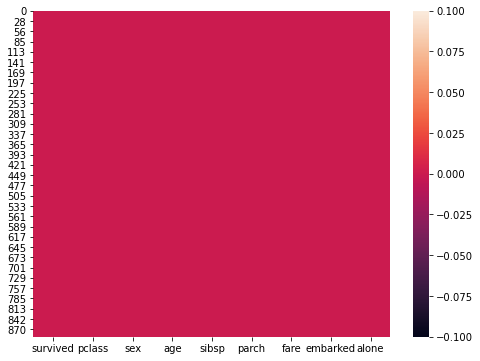

In [21]:
# Checking the heatmap again to see if there are any missing values present.
plt.figure(figsize=(8,6))
sns.heatmap(titanic.isnull())
plt.show()

### 2. WAP to perform encoding of categorial data in a dataset.

In [22]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


We can see that there are three categorical columns viz. 'sex', 'embarked' and 'alone'. Encoding of categorical data can be done using either
LabelEncoder or OneHotEncoder.

LabelEncoder encodes labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the
same value to as assigned earlier.

What one hot encoding does is, it takes a column which has categorical data, which has been label encoded and then splits the column into
multiple columns. The numbers are replaced by 1s and 0s, depending on which column has what value.

Here, we will be using OneHotEncoding for sex and embarked columnns, and LabelEncoder for alone column.

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Making a copy of data so that any unintentional changes are not reflected in original dataset
titanic_copy = titanic.copy()
titanic_copy['alone'] = le.fit_transform(titanic_copy['alone'])
titanic_copy.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1


In [24]:
# Using pandas.get_dummies for one-hot encoding
sex = pd.get_dummies(titanic_copy['sex'],drop_first=True)
embarked = pd.get_dummies(titanic_copy['embarked'],drop_first=True)
titanic_copy = pd.concat([titanic_copy,sex,embarked],axis=1)
titanic = titanic_copy.drop(['sex','embarked'],axis=1)

In [25]:
titanic.head()

,survived,pclass,age,sibsp,parch,fare,alone,male,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,1


### 3. WAP to split a dataset into the Training set and Test set.

The dataset can be split into training and test set using sklearn.model_selection.train_test_split. Here, we will be splitting the dataset with testing size
20% of the complete set

In [26]:
from sklearn.model_selection import train_test_split
#Extracting features and target variable from the dataset.
X, y = titanic.drop('survived',axis=1), titanic['survived']
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [27]:
X_train.head()


,pclass,age,sibsp,parch,fare,alone,male,Q,S
307,1,17.0,1,0,108.9000,0,0,0,0
229,3,25.0,3,1,25.4667,0,0,0,1
82,3,25.0,0,0,7.7875,1,0,1,0
353,3,25.0,1,0,17.8000,0,1,0,1
707,1,42.0,0,0,26.2875,1,1,0,1


In [28]:
y_train.head()

307    1
229    0
82     1
353    0
707    1
Name: survived, dtype: int64

In [29]:
X_test.head()


,pclass,age,sibsp,parch,fare,alone,male,Q,S
511,3,25.0,0,0,8.05,1,1,0,1
613,3,25.0,0,0,7.75,1,1,1,0
615,2,24.0,1,2,65.00,0,0,0,1
337,1,41.0,0,0,134.50,1,0,0,0
718,3,25.0,0,0,15.50,1,1,1,0


In [30]:
y_test.head()

511    0
613    0
615    1
337    1
718    0
Name: survived, dtype: int64

### 4. WAP to perform feature scaling (Normalization) operation on a dataset.

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.
Here’s the formula for normalization:
            
            X new = (X – X min) / (X max – X min)
    
We have normalized the x_train dataset as shown below: 

In [32]:
titanic.head()

,survived,pclass,age,sibsp,parch,fare,alone,male,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,1


In [33]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
X_train_normalized = scalar.fit_transform(X_train)
print(X_train_normalized)

[[0.         0.20584899 0.125      ... 0.         0.         0.        ]
 [1.         0.30669356 0.375      ... 0.         0.         1.        ]
 [1.         0.30669356 0.         ... 0.         1.         0.        ]
 ...
 [1.         0.55880499 0.         ... 1.         0.         1.        ]
 [1.         0.30669356 0.         ... 1.         0.         0.        ]
 [0.5        0.52098828 0.         ... 0.         0.         1.        ]]


In [34]:
X_test_normalized = scalar.transform(X_test)
print(X_test_normalized)

[[1.         0.30669356 0.         ... 1.         0.         1.        ]
 [1.         0.30669356 0.         ... 1.         1.         0.        ]
 [0.5        0.29408799 0.125      ... 0.         0.         1.        ]
 ...
 [1.         0.34451027 0.         ... 1.         0.         1.        ]
 [0.         0.55880499 0.         ... 1.         0.         1.        ]
 [1.         0.30669356 1.         ... 0.         0.         1.        ]]
